# For plots and analyses
Including but not limited to:
- Training curves
- Bar chart of final success rate

This is run *AFTER* `results.csv` has been created via running `python eval_runs.py` with available data under `data/`:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os
import glob
import json

# Read in data
df_2 = pd.read_csv("results_bar2.csv") # for dist < 0.02
df_3 = pd.read_csv("results_bar3.csv") # for dist < 0.03


In [3]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   run           24 non-null     object 
 1   variant       24 non-null     object 
 2   seed          24 non-null     int64  
 3   mean_return   24 non-null     float64
 4   success_rate  24 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ KB


In [4]:
def clean_df(df):
    final_df = df.drop(["seed"], axis=1)

    final_df["num_episodes"] = final_df.run.apply( lambda x : '1M' if '1M' in x else '500K')

    final_df["alpha"] = final_df.run.apply( lambda x : "0.5" if ('a_5' in x) or ('alpha' in x) else "1")

    final_df["variant_base"] = final_df.variant.apply( lambda x : x[:-3] + "K" if ('decay' in x)  else x)
    final_df = final_df.drop(["variant"], axis=1)
    final_df = final_df.loc[~final_df["run"].str.contains("_l2sq") ]
    final_df = final_df.loc[~(final_df["run"] == "none_500K_alpha_5")]
    final_df = final_df.reset_index(drop=True)

    return final_df

In [5]:
df_2_cleaned = clean_df(df_2)
df_2_cleaned

,run,mean_return,success_rate,num_episodes,alpha,variant_base
0,l2sq_seed0,-56.337626,0.225,500K,1,l2sq
1,decay500000_1M,-57.441053,0.181,1M,1,decay500K
2,l2_500K_alpha_5,-1177.365467,0.083,500K,0.5,l2
3,none_seed0,-158.010019,0.112,500K,1,none
4,l2sq_500K_alpha_5,-809.018691,0.208,500K,0.5,l2sq
5,decay500000_500K_alpha_5,-378.210003,0.111,500K,0.5,decay500K
6,none_1M,-128.577612,0.107,1M,1,none
7,decay300000_500K_alpha_5,-907.337576,0.170,500K,0.5,decay300K
8,l2sq_1M,-67.917285,0.188,1M,1,l2sq
9,decay200000_500K_alpha_5,-775.135114,0.115,500K,0.5,decay200K


In [6]:
df_3_cleaned = clean_df(df_3)
df_3_cleaned

,run,mean_return,success_rate,num_episodes,alpha,variant_base
0,l2sq_seed0,-56.670247,0.431,500K,1,l2sq
1,decay500000_1M,-57.524214,0.352,1M,1,decay500K
2,l2_500K_alpha_5,-1179.210658,0.165,500K,0.5,l2
3,none_seed0,-157.386246,0.221,500K,1,none
4,l2sq_500K_alpha_5,-805.900879,0.388,500K,0.5,l2sq
5,decay500000_500K_alpha_5,-382.008130,0.184,500K,0.5,decay500K
6,none_1M,-128.932334,0.191,1M,1,none
7,decay300000_500K_alpha_5,-914.082444,0.295,500K,0.5,decay300K
8,l2sq_1M,-68.170450,0.278,1M,1,l2sq
9,decay200000_500K_alpha_5,-771.745925,0.203,500K,0.5,decay200K


In [7]:
def extract_special_df(df):
    final_df = df.drop(["seed"], axis=1)

    final_df["num_episodes"] = final_df.run.apply( lambda x : '1M' if '1M' in x else '500K')

    final_df["alpha"] = final_df.run.apply( lambda x : "0.5" if ('a_5' in x) or ('alpha' in x) else "1")

    final_df["variant_base"] = final_df.variant.apply( lambda x : x[:-3] + "K" if ('decay' in x)  else x)
    final_df = final_df.drop(["variant"], axis=1)
    final_df = final_df.loc[final_df["run"].str.contains("_l2sq") ]
    final_df = final_df.loc[~(final_df["run"] == "none_500K_alpha_5")]
    final_df = final_df.reset_index(drop=True)

    return final_df

special_df_2 = extract_special_df(df_2)
special_df_3 = extract_special_df(df_3)

In [8]:
special_df_2

,run,mean_return,success_rate,num_episodes,alpha,variant_base
0,decay300000_500K_l2sq_a_5,-347.047205,0.158,500K,0.5,decay300K
1,decay300000_1M_l2sq_a_5,-276.286675,0.207,1M,0.5,decay300K
2,decay500000_500K_l2sq_a_5,-1111.195245,0.123,500K,0.5,decay500K
3,decay200000_1M_l2sq_a_5,-662.764065,0.113,1M,0.5,decay200K
4,decay500000_1M_l2sq_a_5,-424.725774,0.132,1M,0.5,decay500K
5,decay200000_500K_l2sq_a_5,-232.648428,0.187,500K,0.5,decay200K


In [114]:
def moving_average(x, w=30):
    if len(x) < w:
        return x
    return np.convolve(x, np.ones(w)/w, mode="valid")

"""
Plot mean-episode-return curves for every run with moving average
Assumes each train_log.json has {"episode_returns": [...]}.
"""
def plot_learning_curves(exp_dirs, filtered_list, window=50, show_raw=True, title_suffix="", outfile="training_curves.png"):
    upper_limit = -np.inf
    upper_limit_color = 'r'
    
    plt.figure(figsize=(6,4))

    # crazy stuff to get next color
    color_codes = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    for run_dir in exp_dirs:
        run_name = run_dir.split("/")[1]
        if run_name not in filtered_list:
            continue

        log = os.path.join(run_dir, "train_log.json")
        if not os.path.isfile(log):
            print("missing", log)
            continue

        with open(log) as f:
            ep_rets = json.load(f)["episode_returns"]
        
        if len(ep_rets) < 2:
            continue
        
        
        color = color_codes[len(plt.gca().lines) % len(color_codes)]
        
        if show_raw: # to show (blurry) raw curves
            color = color_codes[len(plt.gca().lines) // 2 % len(color_codes)]
            plt.plot(ep_rets, alpha=0.2, linewidth=1, color=color)
        
        # Clear Moving average lines
        ma = moving_average(ep_rets, w=window)
        local_limit = max(ma)
        if upper_limit < local_limit:
            upper_limit = local_limit
            upper_limit_color = color
        x  = np.arange(len(ma)) + (window-1)   # right‑aligned with raw
        plt.plot(x, ma, label=f"{run_name} (MA{window})", linewidth=2, color=color)

    # add upper_limit line
    plt.axhline(y=upper_limit, color='k', linestyle='--', label=f"upper bound = {upper_limit:.2f}")
    plt.text(0, upper_limit, f'{upper_limit:.2f}', color=upper_limit_color, verticalalignment='bottom')

    plt.title("Episode return vs. PPO iteration " + title_suffix)
    plt.xlabel("PPO iteration")
    plt.ylabel("Episode return")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    # plt.savefig(outfile, dpi=150)
    # print(f"Saved {outfile}")


In [ ]:
# categorize by alpha
df_alpha1 = df_2_cleaned.loc[df_2_cleaned["alpha"] == "1"].copy()
df_alpha5 = df_2_cleaned.loc[df_2_cleaned["alpha"] == "0.5"].copy()

# categorize by num_episodes and alpha
df_1M_alpha1 = df_alpha1.loc[df_alpha1["num_episodes"] == "1M"].copy()
df_500K_alpha1 = df_alpha1.loc[df_alpha1["num_episodes"] == "500K"].copy()
df_500K_alpha5 = df_alpha5.loc[df_alpha5["num_episodes"] == "500K"].copy()

In [11]:
# init the experiment directories
exp_dirs = glob.glob("data/*/")

### 500K steps and $\alpha = 1$

In [102]:
df_500K_alpha1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 16
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   run           6 non-null      object 
 1   mean_return   6 non-null      float64
 2   success_rate  6 non-null      float64
 3   num_episodes  6 non-null      object 
 4   alpha         6 non-null      object 
 5   variant_base  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 336.0+ bytes


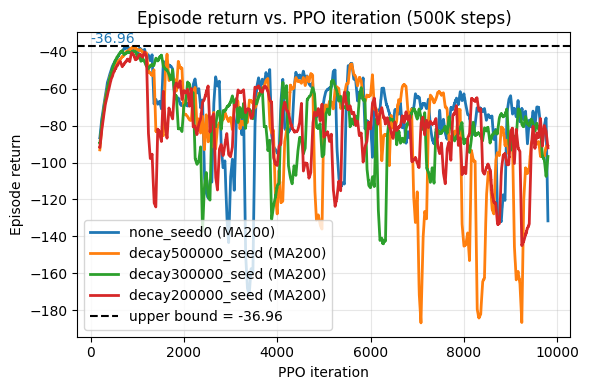

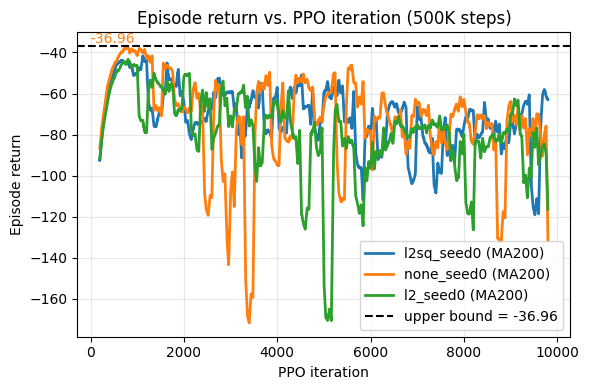

In [103]:
file_suffix = "500K"
filter_terms = ["decay", "l2"]
for variant in filter_terms:
    filtered_list = df_500K_alpha1.loc[(df_500K_alpha1["run"].str.contains(variant) | df_500K_alpha1["run"].str.contains("none"))]["run"].to_list()
    plot_learning_curves(exp_dirs, filtered_list, window=200, show_raw=False, title_suffix=f"({file_suffix} steps)" ,outfile=f"training_curves_{variant}_{file_suffix}.png")

### 1M steps and $\alpha = 1$

In [75]:
df_1M_alpha1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 1 to 13
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   run           6 non-null      object 
 1   mean_return   6 non-null      float64
 2   success_rate  6 non-null      float64
 3   num_episodes  6 non-null      object 
 4   alpha         6 non-null      object 
 5   variant_base  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 336.0+ bytes


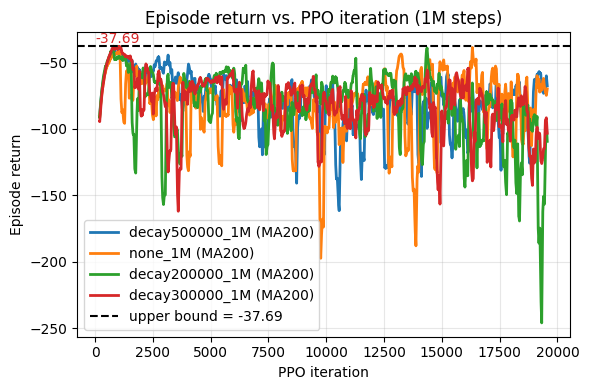

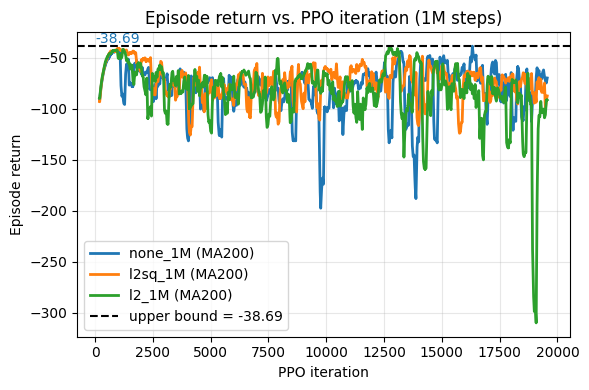

In [101]:
file_suffix = "1M"
filter_terms = ["decay", "l2"]
for variant in filter_terms:
    filtered_list = df_1M_alpha1.loc[(df_1M_alpha1["run"].str.contains(variant) | df_1M_alpha1["run"].str.contains("none"))]["run"].to_list()
    plot_learning_curves(exp_dirs, filtered_list, window=200, show_raw=False, title_suffix=f"({file_suffix} steps)" ,outfile=f"training_curves_{variant}_{file_suffix}.png")

### 500K steps and $\alpha = 0.5$

In [99]:
df_500K_alpha5

,run,mean_return,success_rate,num_episodes,alpha,variant_base
2,l2_500K_alpha_5,-1177.365467,0.083,500K,0.5,l2
4,l2sq_500K_alpha_5,-809.018691,0.208,500K,0.5,l2sq
5,decay500000_500K_alpha_5,-378.210003,0.111,500K,0.5,decay500K
7,decay300000_500K_alpha_5,-907.337576,0.170,500K,0.5,decay300K
9,decay200000_500K_alpha_5,-775.135114,0.115,500K,0.5,decay200K


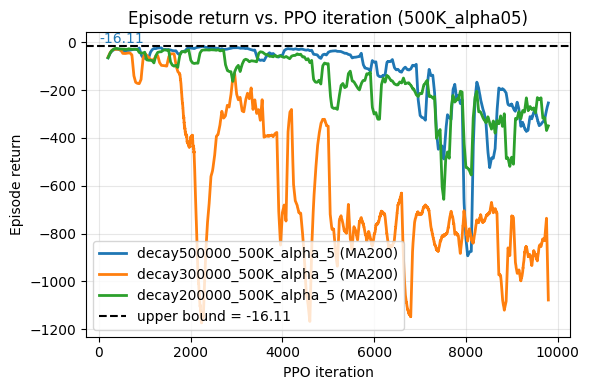

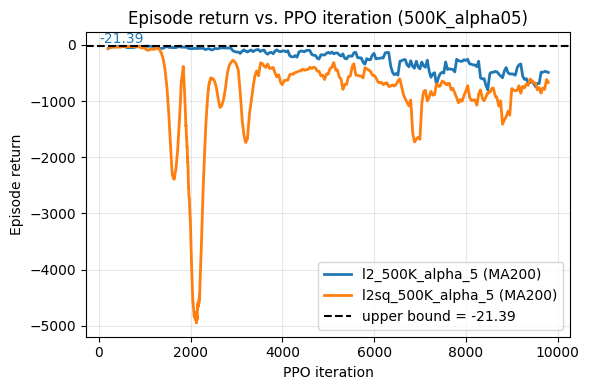

In [100]:
file_suffix = "500K_alpha05"
filter_terms = ["decay", "l2"]
for variant in filter_terms:
    filtered_list = df_500K_alpha5.loc[(df_500K_alpha5["run"].str.contains(variant))]["run"].to_list()
    plot_learning_curves(exp_dirs, filtered_list, window=200, show_raw=False, title_suffix=f"({file_suffix})" ,outfile=f"training_curves_{variant}_{file_suffix}.png")

## (Special cases) Decay with $L2^2$
### 500K/1M steps and $\alpha = 0.5$

In [90]:
special_df_2

,run,mean_return,success_rate,num_episodes,alpha,variant_base
0,decay300000_500K_l2sq_a_5,-347.047205,0.158,500K,0.5,decay300K
1,decay300000_1M_l2sq_a_5,-276.286675,0.207,1M,0.5,decay300K
2,decay500000_500K_l2sq_a_5,-1111.195245,0.123,500K,0.5,decay500K
3,decay200000_1M_l2sq_a_5,-662.764065,0.113,1M,0.5,decay200K
4,decay500000_1M_l2sq_a_5,-424.725774,0.132,1M,0.5,decay500K
5,decay200000_500K_l2sq_a_5,-232.648428,0.187,500K,0.5,decay200K


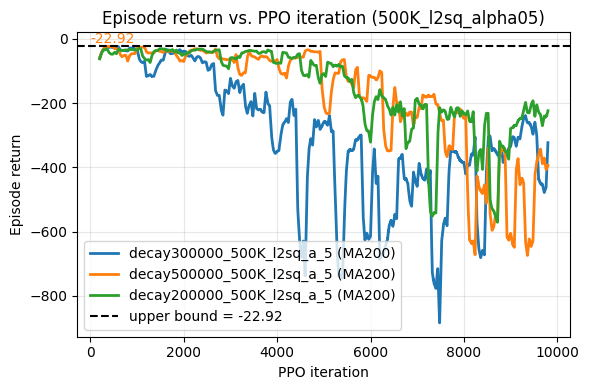

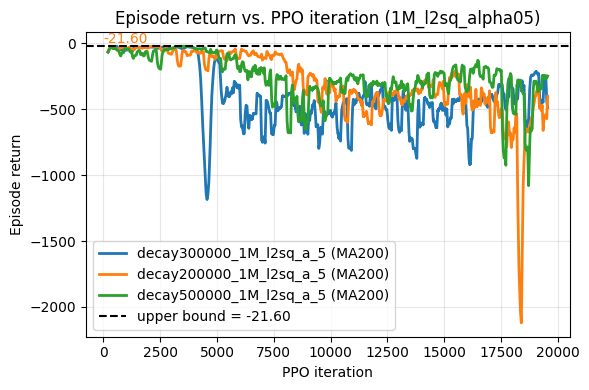

In [111]:
for steps in ["500K", "1M"]:
    file_suffix = f"{steps}_l2sq_alpha05"
    filtered_list = special_df_2.loc[(special_df_2["num_episodes"] == steps)]["run"].to_list()
    plot_learning_curves(exp_dirs, filtered_list, window=200, show_raw=False, title_suffix=f"({file_suffix})" ,outfile=f"training_curves_decay_{file_suffix}.png")

## Mean returns

In [ ]:
def plot_mean_curves(exp_dirs, filtered_list, window=50, show_raw=True, title_suffix="", outfile="mean_curves.png"):
    upper_limit = -np.inf
    upper_limit_color = 'r'
    
    plt.figure(figsize=(6,4))

    # crazy stuff to get next color
    color_codes = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    for run_dir in exp_dirs:
        run_name = run_dir.split("/")[1]
        if run_name not in filtered_list:
            continue

        log = os.path.join(run_dir, "train_log.json")
        if not os.path.isfile(log):
            print("missing", log)
            continue

        with open(log) as f:
            ep_rets = json.load(f)#["episode_returns"]
            if "mean_returns" in ep_rets:
                ep_rets = ep_rets["mean_returns"]
            else: print("missing mean_returns"); continue
        
        if len(ep_rets) < 2:
            continue
        
        color = color_codes[len(plt.gca().lines) % len(color_codes)]
        
        if show_raw: # to show (blurry) raw curves
            color = color_codes[len(plt.gca().lines) // 2 % len(color_codes)]
            plt.plot(ep_rets, alpha=0.2, linewidth=1, color=color)
        
        # Clear Moving average lines
        ma = moving_average(ep_rets, w=window)
        local_limit = max(ma)
        if upper_limit < local_limit:
            upper_limit = local_limit
            upper_limit_color = color
        x  = np.arange(len(ma)) + (window-1)   # right‑aligned with raw
        plt.plot(x, ma, label=f"{run_name} (MA{window})", linewidth=2, color=color)

    # add upper_limit line
    plt.axhline(y=upper_limit, color='k', linestyle='--', label=f"upper bound = {upper_limit:.2f}")
    plt.text(0, upper_limit, f'{upper_limit:.2f}', color=upper_limit_color, verticalalignment='bottom')

    plt.title("Mean Episode return vs. PPO iteration " + title_suffix)
    plt.xlabel("PPO iteration")
    plt.ylabel("Episode return")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    # plt.savefig(outfile, dpi=150)
    # print(f"Saved {outfile}")


### 500K steps and $\alpha=1$

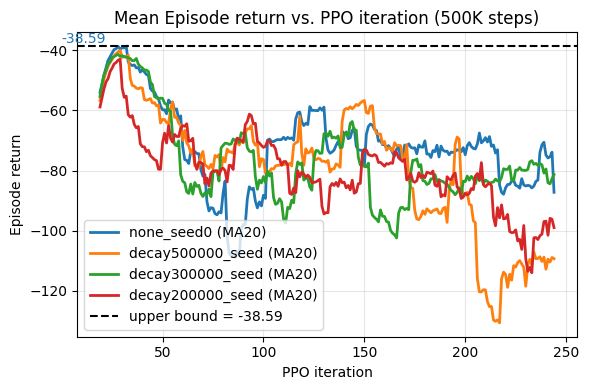

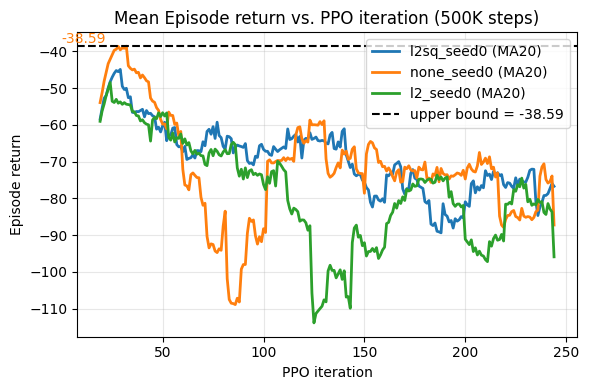

In [124]:
file_suffix = "500K"
filter_terms = ["decay", "l2"]
for variant in filter_terms:
    filtered_list = df_500K_alpha1.loc[(df_500K_alpha1["run"].str.contains(variant) | df_500K_alpha1["run"].str.contains("none"))]["run"].to_list()
    plot_mean_curves(exp_dirs, filtered_list, window=20, show_raw=False, title_suffix=f"({file_suffix} steps)" ,outfile=f"mean_curves_{variant}_{file_suffix}.png")

### 1M steps and $\alpha = 1$

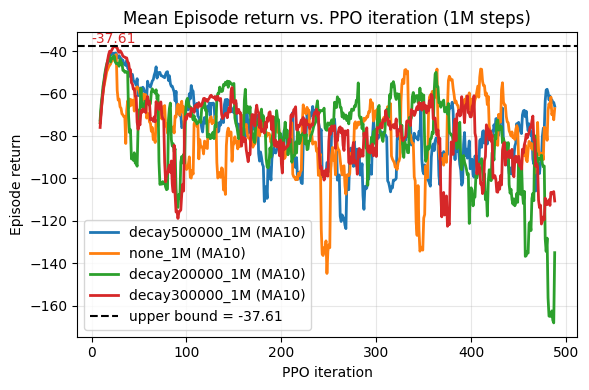

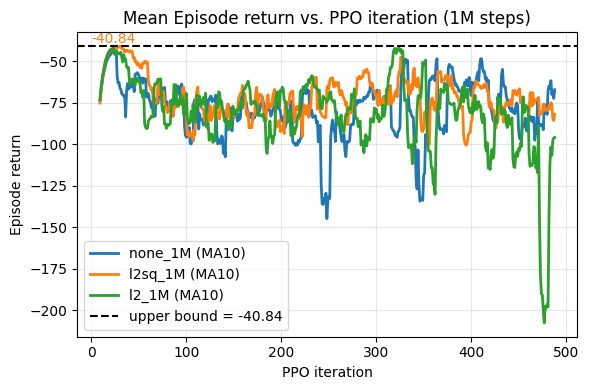

In [129]:
file_suffix = "1M"
filter_terms = ["decay", "l2"]
for variant in filter_terms:
    filtered_list = df_1M_alpha1.loc[(df_1M_alpha1["run"].str.contains(variant) | df_1M_alpha1["run"].str.contains("none"))]["run"].to_list()
    plot_mean_curves(exp_dirs, filtered_list, window=10, show_raw=False, title_suffix=f"({file_suffix} steps)" ,outfile=f"mean_curves_{variant}_{file_suffix}.png")

### 500K steps and $\alpha = 0.5$

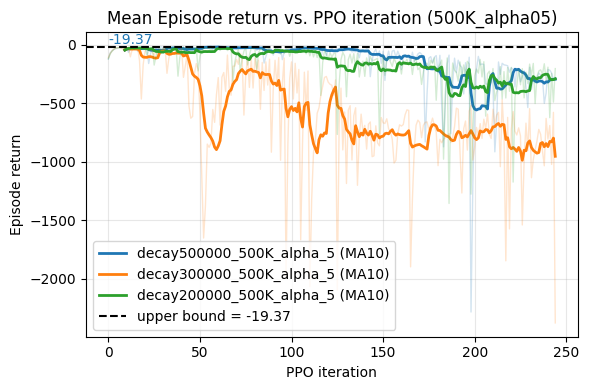

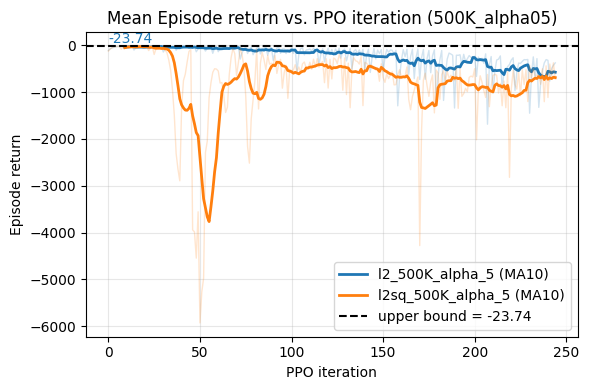

In [131]:
file_suffix = "500K_alpha05"
filter_terms = ["decay", "l2"]
for variant in filter_terms:
    filtered_list = df_500K_alpha5.loc[(df_500K_alpha5["run"].str.contains(variant))]["run"].to_list()
    plot_mean_curves(exp_dirs, filtered_list, window=10, show_raw=True, title_suffix=f"({file_suffix})" ,outfile=f"mean_curves_{variant}_{file_suffix}.png")

### Special cases - decay with L2 squared

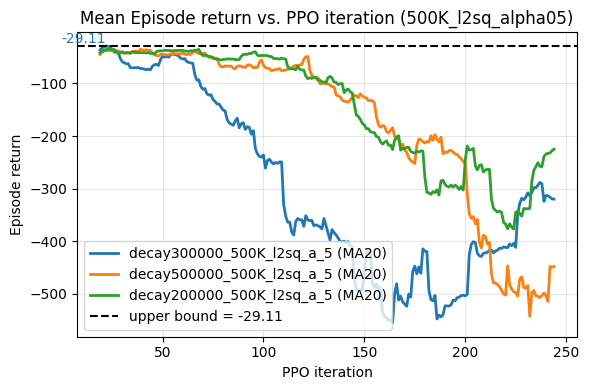

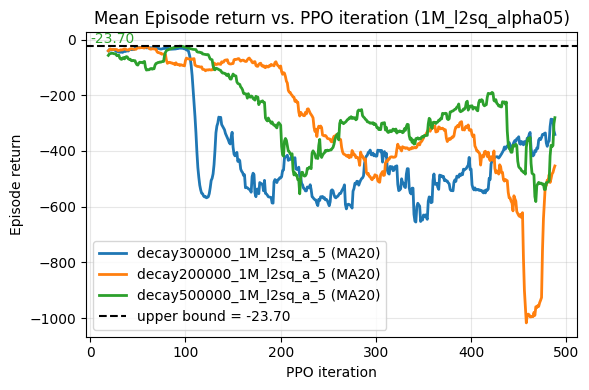

In [125]:
for steps in ["500K", "1M"]:
    file_suffix = f"{steps}_l2sq_alpha05"
    filtered_list = special_df_2.loc[(special_df_2["num_episodes"] == steps)]["run"].to_list()
    plot_mean_curves(exp_dirs, filtered_list, window=20, show_raw=False, title_suffix=f"({file_suffix})" ,outfile=f"mean_curves_decay_{file_suffix}.png")

# Plotting Success rate

In [17]:
def plot_success_rates(df):
    base_col="variant_base"
    episodes_col="num_episodes"
    alpha_col="alpha"
    rate_col="success_rate"

    figsize=(9, 6)
    aggfunc="mean"
    # 1) Group by (variant_base, num_episodes, alpha)
    grouped = (df
               .groupby([base_col, episodes_col, alpha_col], as_index=False)[rate_col]
               .agg(aggfunc))

    # Categorize episode
    episode_order = ["500K", "1M"]
    grouped[episodes_col] = pd.Categorical(
        grouped[episodes_col], categories=episode_order, ordered=True)

    # Pivot table rows = variant_base, columns = (num_episodes, alpha)
    pivot = (grouped
             .pivot_table(index=base_col,
                          columns=[episodes_col, alpha_col],
                          values=rate_col,
                          aggfunc=aggfunc)
             .sort_index())

    # 4) Bar plotting
    n_groups = len(pivot.index)
    n_bars = len(pivot.columns)
    bar_width = 0.8 / n_bars
    base_x = np.arange(n_groups)

    fig, ax = plt.subplots(figsize=figsize)

    for i, (episode, alpha) in enumerate(pivot.columns):
        offsets = base_x - 0.4 + bar_width/2 + i*bar_width
        label = f"{episode}, α={alpha}"
        ax.bar(offsets, pivot[(episode, alpha)], width=bar_width, label=label)

    ax.set_xlabel(base_col)
    ax.set_ylabel(rate_col)
    ax.set_title(f"{rate_col} grouped by ({base_col}, {episodes_col}, {alpha_col})")
    ax.set_xticks(base_x)
    ax.set_xticklabels(pivot.index, rotation=15, ha="right")
    ax.legend(title="Episodes & α")
    ax.margins(x=0.02)

    plt.tight_layout()
    plt.show()
    # plt.savefig("success_rate.png")

/var/folders/bb/c9ndpppd6hvb0fv0l0n19x200000gn/T/ipykernel_18829/1372588390.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(index=base_col,


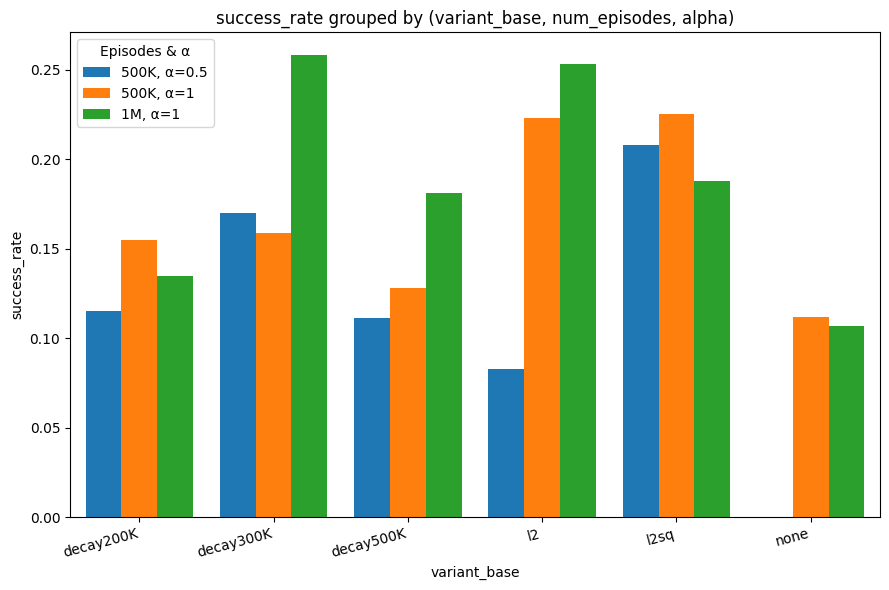

In [30]:
# for df_2 where dist < 0.02
plot_success_rates(df_2_cleaned)

/var/folders/bb/c9ndpppd6hvb0fv0l0n19x200000gn/T/ipykernel_18829/1372588390.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(index=base_col,


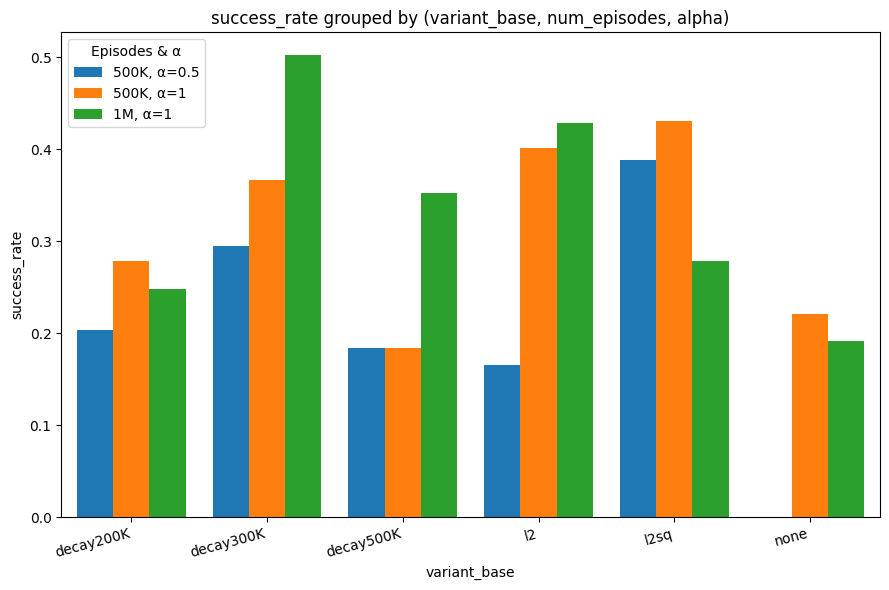

In [31]:
# for df_3 where dist < 0.03
plot_success_rates(df_3_cleaned)

/var/folders/bb/c9ndpppd6hvb0fv0l0n19x200000gn/T/ipykernel_18829/1372588390.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(index=base_col,


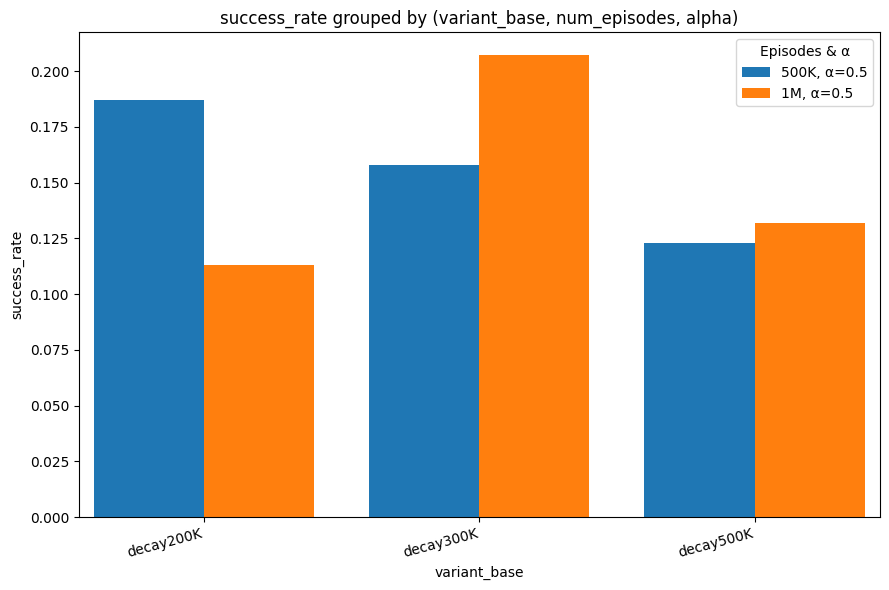

In [32]:
plot_success_rates(special_df_2)

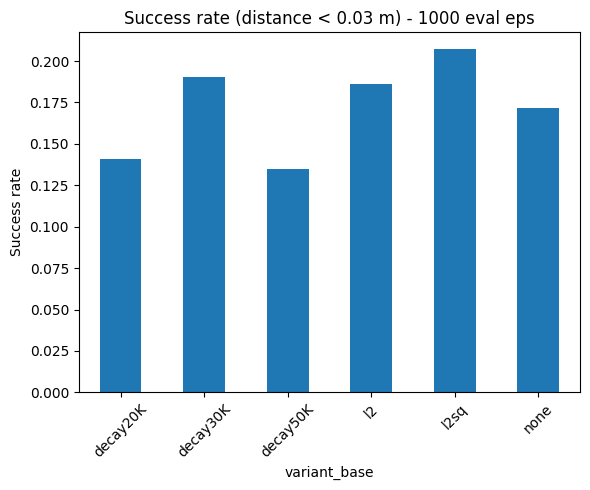

In [ ]:
# Draw Success rate
plt.figure(figsize=(6,5))
(final_df.groupby("variant_base")["success_rate"]
   .mean().plot(kind="bar", rot=45, x_label = "variant",ylabel="Success rate"))
plt.title("Success rate (distance < 0.02 m) - 1000 eval eps")
plt.tight_layout()
# plt.savefig("success_rate.png", dpi=150)
# print("Saved success_rate.png")

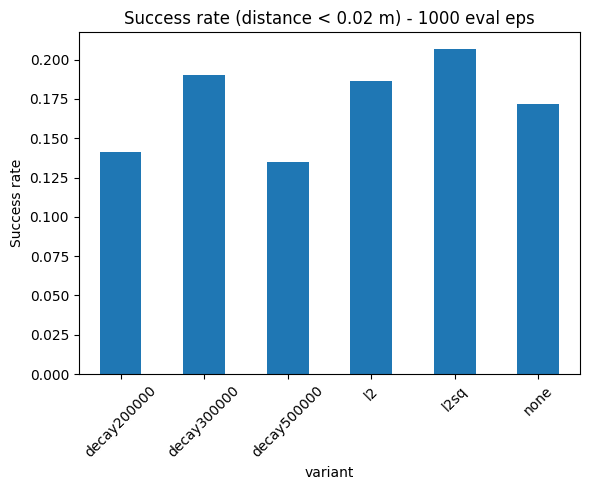

In [59]:
# Draw Success rate when (dist < 0.2)
plt.figure(figsize=(6,5))
(df.groupby("variant")["success_rate"]
   .mean().plot(kind="bar", rot=45, ylabel="Success rate"))
plt.title("Success rate (distance < 0.02 m) - 1000 eval eps")
plt.tight_layout()
# plt.savefig("success_rate.png", dpi=150)
# print("Saved success_rate.png")